In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
tests_dir = '~/projects/basenji/testing/loop_test'

In [4]:
track_info = '/home/earmand/projects/basenji/datasets/macaque_mcg_atac/targets.txt'

In [5]:
tests_dir_4 = '~/projects/basenji/testing/four_species_2_modality/_model_human_all_mod_predict/'
# tests_dir_4 = '~/projects/basenji/testing/loop_test/human_well_covered_model_human_well_covered_predict/'

In [6]:
!ls /home/earmand/projects/basenji/testing/loop_test/human_well_covered_model_human_well_covered_predict//

acc.txt   peak_outs  pr        roc	targets.h5
bedgraph  peaks.txt  preds.h5  scatter	violin


In [7]:
def read_records(path_to_outs, indexes=np.arange(17, 31)):
    """
    inputs:
        path_to_outs : a path to the output directory
        indexes : the predictions to collect

    """
    pred_vals = []
    true_vals = []
    for id in indexes:
        dat_pred = pd.read_csv(path_to_outs + f'peak_outs/preds_t{id}.bedgraph', sep='\t', header=None)
        dat_true = pd.read_csv(path_to_outs + f'peak_outs/targets_t{id}.bedgraph', sep='\t', header=None)

        pred_vals.append(dat_pred.groupby(3)[8].mean().rename(f'record_{id}'))
        true_vals.append(dat_true.groupby(3)[8].mean().rename(f'record_{id}'))
    records_pred = pd.concat(pred_vals, axis=1)
    records_true = pd.concat(true_vals, axis=1)

    return records_pred, records_true

In [8]:
pred_4, true_4 = read_records(tests_dir_4)

In [9]:
from scipy.stats import spearmanr

In [10]:
atac_stats = pd.read_csv('/home/earmand/projects/basenji/datasets/ref_data/peak_sets/atac_summary_table.tsv', sep='\t')

In [11]:
corrs_4 = []
dists = []
highest_pred = []

for idx in true_4.index:
    pred, true = pred_4.loc[idx].values, true_4.loc[idx].values
    corr_4, _ = spearmanr(pred, true, nan_policy='omit')
    dist = np.mean(np.abs(pred - true))
    same_max = np.argmax(pred) == np.argmax(true)
    # corr_s, _ = spearmanr(pred_single.loc[idx].values, true_single.loc[idx].values, nan_policy='omit')
    corrs_4.append(corr_4)
    dists.append(dist)
    highest_pred.append(same_max)

In [12]:
me3 = pd.read_csv('/home/earmand/projects/basenji/datasets/ref_data/k27/human_m1_level0_2kb_h3k27me3_counts.bed', sep='\t')

In [13]:
me3.head()

,chr,start,end,peak_id,VIP,SNCG,LAMP5,SST,PVALB,ChC,...,L5_ET,L5_6_NP,L6_CT,L6b,Endo,VLMC,MGC,OPC,ODC,ASC
0,chr10,6221851,6223850,ASC_peak_10000b,1,1,0,0,0,0,...,1,5,3,0,0,0,2,0,3,4
1,chr10,6232150,6234149,ASC_peak_10001b,5,0,1,1,1,0,...,0,1,0,0,0,0,1,1,19,18
2,chr10,6246365,6248364,ASC_peak_10003,0,0,0,3,0,0,...,0,1,0,0,0,0,1,1,1,5
3,chr10,6278615,6280614,ASC_peak_10006,2,0,0,1,3,0,...,0,0,0,0,0,0,0,1,3,5
4,chr10,6311036,6313035,ASC_peak_10012,8,0,2,7,13,0,...,0,1,4,0,0,0,0,4,1,6


In [14]:
true_4

,record_17,record_18,record_19,record_20,record_21,record_22,record_23,record_24,record_25,record_26,record_27,record_28,record_29,record_30
3,,,,,,,,,,,,,,
ASC_peak_26778a,26.7980,10.0000,1.2000,9.0000,2.2000,9.2328,5.4000,3.25000,5.0664,191.8000,24.0400,9.180,3.70,7.4500
ASC_peak_26793,20.3600,5.5328,0.6334,1.8800,1.2334,5.9000,4.2000,2.20000,6.0400,55.6900,2.8668,8.500,1.30,8.7468
ASC_peak_26795,85.0680,19.5400,3.2000,7.2000,2.6000,15.8900,17.2000,3.60000,14.2000,130.2000,11.8000,6.800,3.00,10.3000
ASC_peak_26796,19.1000,5.0000,0.0000,4.4000,1.6000,5.2000,4.6000,3.50000,20.0500,154.6000,37.8000,7.200,3.00,10.0000
ASC_peak_26806,17.8000,9.2000,0.8000,3.7000,1.4000,4.4000,3.8000,4.80000,4.0000,56.0000,8.4000,5.100,2.60,8.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VLMC_peak_44223,59.6000,14.0000,5.0000,8.2000,6.4000,14.4000,4.4000,4.40000,6.6000,128.0000,8.6000,11.800,1.40,13.8000
VLMC_peak_44225,298.8000,82.4600,11.0000,44.1000,35.5320,78.0000,57.9280,57.04000,43.2000,355.0000,45.7000,98.800,32.45,120.6200
VLMC_peak_44228,230.4000,90.4000,10.4000,42.8000,31.3000,88.0000,49.8000,54.26000,42.0000,355.6000,42.0000,84.400,22.60,93.3200


In [15]:
me3 = me3.set_index('peak_id')
me3 = me3.drop(['chr', 'start', 'end'],
               axis=1)

In [16]:
me3 = me3*1e6/me3.sum()

In [17]:
eval = pd.DataFrame(index=true_4.index,
                    columns=['corr', 'dist', 'top_type', 'mean', 'max'], 
                    data=np.array([corrs_4, dists, highest_pred, true_4.mean(axis=1), true_4.max(axis=1)]).T
                   )

In [18]:
eval.head()

,corr,dist,top_type,mean,max
3,,,,,
ASC_peak_26778a,0.775824,13.941086,1.0,22.022657,191.80
ASC_peak_26793,0.780220,4.597321,0.0,8.934514,55.69
ASC_peak_26795,0.745055,19.437529,0.0,23.614143,130.20
ASC_peak_26796,0.652747,10.933550,1.0,19.717857,154.60
ASC_peak_26806,0.652747,11.327414,0.0,9.328571,56.00


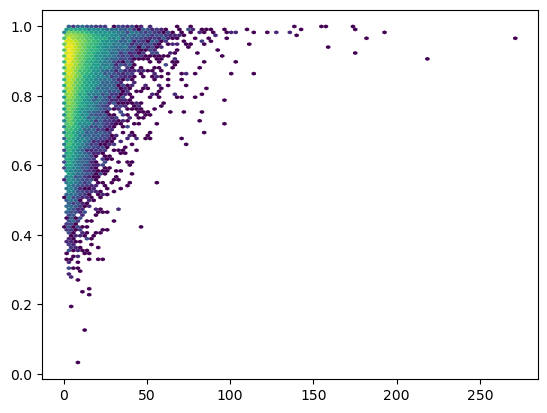

In [19]:
plt.hexbin(dists, corrs_4, bins='log',lw=0)

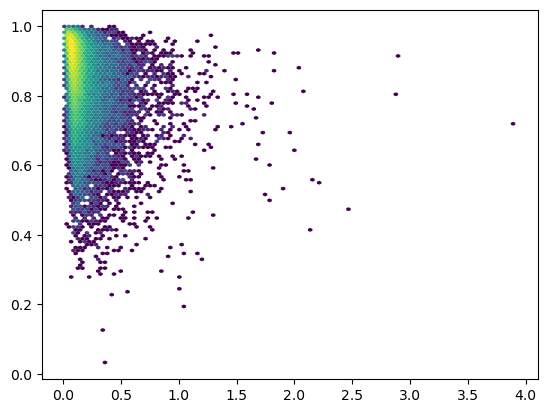

In [20]:
plt.hexbin(eval.dist/eval['max'], corrs_4, bins='log',lw=0)

In [21]:
from scipy.stats import pearsonr

In [22]:
def read_list(listfile):
    return open(listfile, 'r').read().strip('\n').split('\n')

In [23]:
human_biased_peak = read_list('/home/earmand/projects/basenji/datasets/ref_data/peak_sets/human_biased_peaks.txt')

In [24]:
# human_biased_peak

In [25]:
atac_stats['human_biased'] = atac_stats.shortname.isin(human_biased_peak)

In [26]:
atac_stats = atac_stats.set_index('3')

In [27]:
stats_use = atac_stats.loc[true_4.index]

In [28]:
kme3 = me3.reindex(true_4.index)

In [29]:
ct_peak_calls = pd.read_csv('/home/earmand/projects/basenji/datasets/ref_data/peak_sets/peak_x_cell_type/human_union_peak_calls.tsv', sep='\t')

In [30]:
ct_peak_calls = ct_peak_calls.set_index('3').loc[true_4.index]

In [31]:
import seaborn as sns

In [32]:
stats_use['human_specific_sequence'].sum()

777

In [33]:
stats_use.head()

,shortname,0,1,2,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,level1_marmoset,...,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate,human_biased
3,,,,,,,,,,,,,,,,,,,,,
ASC_peak_26778a,chr14-20434519-20435018,chr14,20434519,20435018,33.988349,False,True,False,True,True,...,False,MamSINE1|SINE|tRNA-RTE,1061,KLHL33,tRNA-RTE,1.975853,1.261794,1.557525,1.075177,True
ASC_peak_26793,chr14-20818830-20819329,chr14,20818830,20819329,4.117874,False,False,False,False,False,...,False,AluJr|SINE|Alu,-16236,RNASE1,Alu,NaN,NaN,NaN,NaN,False
ASC_peak_26795,chr14-20836573-20837072,chr14,20836573,20837072,8.086429,False,False,False,False,False,...,False,Intergenic,-33979,RNASE1,Intergenic,NaN,NaN,NaN,NaN,False
ASC_peak_26796,chr14-20848956-20849455,chr14,20848956,20849455,26.298398,False,False,True,True,True,...,False,Intergenic,-42197,RNASE3,Intergenic,3.557022,0.972439,3.557022,0.972439,False
ASC_peak_26806,chr14-21033246-21033745,chr14,21033246,21033745,10.255013,False,True,False,True,True,...,False,TTS (NM_173846),1311,RNASE13,TTS,1.820884,1.475426,2.175198,0.918567,False


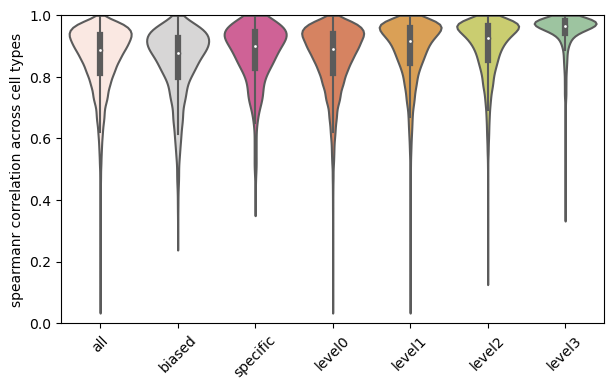

In [34]:
fig, ax = plt.subplots(figsize=(7,4))
sns.violinplot([
    eval['corr'],
    eval.loc[stats_use['human_biased'], 'corr'],
    eval.loc[stats_use['human_specific_sequence'], 'corr'],
    eval.loc[stats_use['mammal_level0'], 'corr'],
    eval.loc[stats_use['level1_mammal'], 'corr'],
    eval.loc[stats_use['mammal_level2'], 'corr'],
    eval.loc[stats_use['mammal_level3'], 'corr'],],

    palette=[
        '#FEE6DE', 
        '#D7D6D6',
         '#E15095',
         '#EA7B4D',
         '#F0A240',
         '#D9DD60',
         '#96CB9B'
        ],

                   width=.8,
    cut=0,
               
    scale='width'
    )
ax.set_ylim(0,1)
# ax.set_ylabel('correlation across cell types
plt.xticks(np.arange(0,7), labels=['all', 'biased', 'specific', 'level0', 'level1', 'level2', 'level3'], rotation=45)
plt.ylabel('spearmanr correlation across cell types')
plt.savefig('./figures/cross_cell_correlation_by_type_multi_species.pdf', dpi=400, bbox_inches='tight')

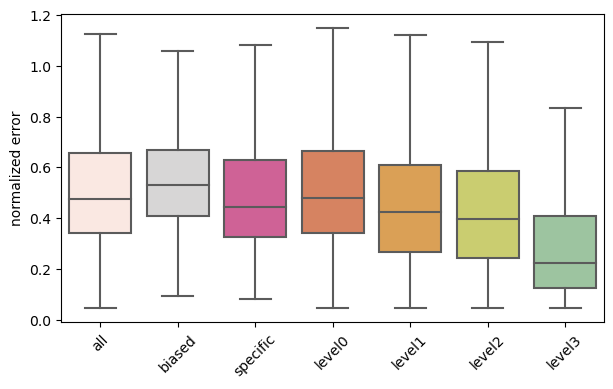

In [35]:
fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot([
    eval['dist']/eval['mean'],
    eval.loc[stats_use['human_biased'], 'dist']/eval.loc[stats_use['human_biased'], 'mean'],
    eval.loc[stats_use['human_specific_sequence'], 'dist']/eval.loc[stats_use['human_specific_sequence'], 'mean'],
    eval.loc[stats_use['mammal_level0'], 'dist']/eval.loc[stats_use['mammal_level0'], 'mean'],
    eval.loc[stats_use['level1_mammal'], 'dist']/eval.loc[stats_use['level1_mammal'], 'mean'],
    eval.loc[stats_use['mammal_level2'], 'dist']/eval.loc[stats_use['mammal_level2'], 'mean'],
    eval.loc[stats_use['mammal_level3'], 'dist']/eval.loc[stats_use['mammal_level3'], 'mean'],
],
    palette=[
        '#FEE6DE', 
        '#D7D6D6',
         '#E15095',
         '#EA7B4D',
         '#F0A240',
         '#D9DD60',
         '#96CB9B'
        ],
            showfliers=False,

                   width=.8,
               
    # scale='width'
    )
# ax.set_ylim(0,1)
ax.set_ylabel('normalized error')
plt.xticks(np.arange(0,7), labels=['all', 'biased', 'specific', 'level0', 'level1', 'level2', 'level3'], rotation=45)
# plt.
plt.savefig('./figures/cross_cell_error_by_type_multi_species.pdf', dpi=400, bbox_inches='tight')

In [36]:
# stats_use['simple_annot']

In [37]:
unpredicted = eval.index[eval.top_type ==0]

In [38]:
[eval['top_type'].mean(),
    eval.loc[stats_use['human_specific_sequence'], 'top_type'].mean(),
    eval.loc[stats_use['human_biased'], 'top_type'].mean(),
    eval.loc[stats_use['mammal_level0'], 'top_type'].mean(),
    eval.loc[stats_use['level1_mammal'], 'top_type'].mean(),
    eval.loc[stats_use['mammal_level2'], 'top_type'].mean(),
    eval.loc[stats_use['mammal_level3'], 'top_type'].mean(),
]

[0.7093740442450811,
 0.752895752895753,
 0.6973151894078705,
 0.7040990017021668,
 0.7373202119606359,
 0.7526552287581699,
 0.8131279303415941]

In [39]:
# sns.violinplot([eval.loc[eval.top_type, 'corr'], eval.loc[~eval.top_type, 'corr']

In [40]:
x = kme3.mean(axis=1)

In [41]:
# spearmanr(np.log2(x+1), eval['corr'], nan_policy='o)

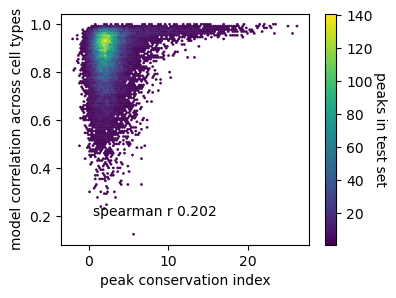

In [42]:
# extent=([0, 6, 0, 6])
fig, ax = plt.subplots(figsize=(4, 3))
im = plt.hexbin(stats_use['conservation_idx'], eval['corr'], mincnt=1, lw=.25)
plt.xlabel('peak conservation index')
plt.ylabel('model correlation across cell types')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('peaks in test set',
                       rotation=270,
                       labelpad=10)
ax.text(.5, .2, 'spearman r {:.3}'.format(spearmanr(stats_use['conservation_idx'], 
                                            eval['corr'],
                                            nan_policy='omit')[0]))
plt.savefig('./figures/cons_idx_corr_multispecies.pdf', dpi=400, bbox_inches='tight')

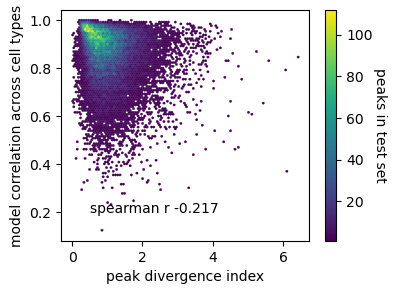

In [43]:
# extent=([0, 6, 0, 6])
fig, ax = plt.subplots(figsize=(4, 3))
im = plt.hexbin(stats_use['divergence_idx'], eval['corr'], mincnt=1, lw=.25)
plt.xlabel('peak divergence index')
plt.ylabel('model correlation across cell types')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('peaks in test set',
                       rotation=270,
                       labelpad=10)
ax.text(.5, .2, 'spearman r {:.3}'.format(spearmanr(stats_use['divergence_idx'], 
                                            eval['corr'],
                                            nan_policy='omit')[0]))
plt.savefig('./figures/divergence_idx_corr_multispecies.pdf', dpi=400, bbox_inches='tight')

In [44]:
eval['norm_dist'] = eval['dist']/eval['mean']

In [45]:
eval['low_acc'] = np.logical_or(eval['corr'] < .8, eval.norm_dist > 1)
# np.logical_or(eval['corr'] < .5, eval.norm_dist > 1)

In [46]:
# sns.boxplot([x.loc[eval.low_acc], eval.loc[~eval.low_acc, 'norm_dist']], showfliers=False)

In [47]:
low_acc_dist = stats_use.loc[eval.low_acc].simple_annot.value_counts()/eval.low_acc.sum()

In [48]:
eval.low_acc.sum()

10974

In [49]:
eval.shape

(39236, 7)

In [50]:
all_dist = stats_use.simple_annot.value_counts()/stats_use.shape[0]

In [51]:
low_acc_compare = [low_acc_dist[i] for i in all_dist.index[:10]]   

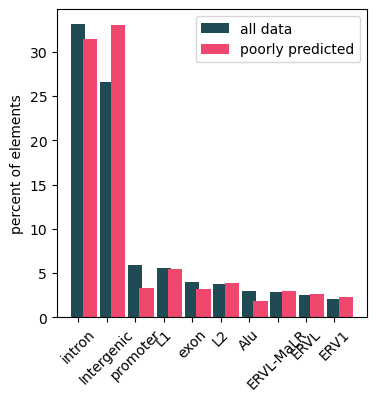

In [52]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.bar(np.arange(10), all_dist[:10]*100, width = .5, color='#1F4B55', 
       label='all data')
plt.bar(np.arange(10) +.4, np.array(low_acc_compare)*100, width=.5, color='#EF476E', label='poorly predicted')
plt.legend()
plt.ylabel('percent of elements')
plt.xticks(np.arange(10), labels= all_dist[:10].index, rotation=45)
plt.savefig('./figures/predictability_catagories_multi.pdf', dpi=400, bbox_inches='tight')

In [53]:
stats_use.loc[eval.low_acc].human_biased.value_counts()

human_biased
False    10210
True       764
Name: count, dtype: int64

In [54]:
stats_use.human_biased.value_counts()

human_biased
False    36517
True      2719
Name: count, dtype: int64

In [56]:
pd.Series(low_acc_compare, index= all_dist.index[:10])

simple_annot
intron        0.314471
Intergenic    0.329962
promoter      0.033260
L1            0.054401
exon          0.032531
L2            0.038728
Alu           0.019045
ERVL-MaLR     0.029798
ERVL          0.026062
ERV1          0.023237
dtype: float64

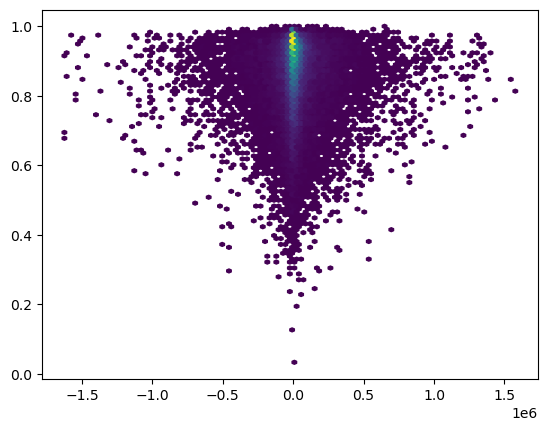

In [57]:
plt.hexbin(stats_use['nearest_tss_dist'], eval['corr'],  mincnt=1)

Text(0.5, 1.0, 'human predictions four species model')

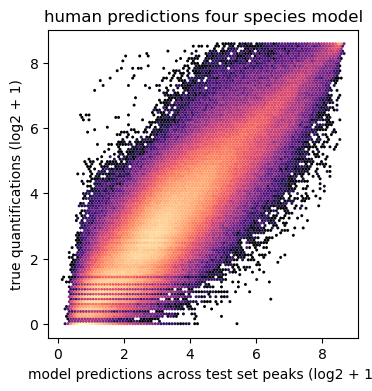

In [58]:
fig, ax = plt.subplots(figsize=(4,4))
plt.hexbin(np.log2(pred_4.values.flatten() + 1),
           np.log2(true_4.values.flatten()+ 1),
           bins='log',edgecolors=None, cmap='magma')
plt.xlabel('model predictions across test set peaks (log2 + 1)')
plt.ylabel('true quantifications (log2 + 1)')
plt.title('human predictions four species model')


Text(0.5, 1.0, 'human_predictions four species model')

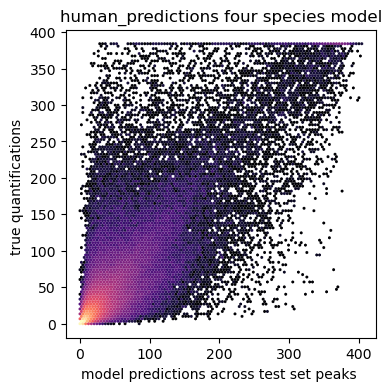

In [59]:
fig, ax = plt.subplots(figsize=(4,4))
plt.hexbin(pred_4.values.flatten(),
           true_4.values.flatten(),
           bins='log',edgecolors=None, cmap='magma')
plt.xlabel('model predictions across test set peaks ')
plt.ylabel('true quantifications ')
plt.title('human_predictions four species model')


NameError: name 'pred_single' is not defined

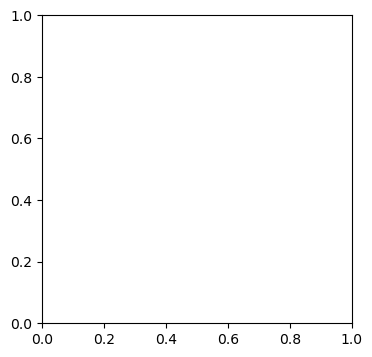

In [60]:
fig, ax = plt.subplots(figsize=(4,4))
plt.hexbin(pred_single.values.flatten(),
           true_single.values.flatten(),
           bins='log',edgecolors=None, cmap='magma')
plt.xlabel('model predictions across test set peaks ')
plt.ylabel('true quantifications ')
plt.title('human predictions bimodal model')


In [ ]:
pearsonr(np.log2(pred.values.flatten() + 1), np.log2(true.values.flatten()+ 1))

In [ ]:
spearmanr(pred.values.flatten(), true.values.flatten())

In [ ]:
np.isnan(corrs2).sum()

In [ ]:
np.nanmean(corrs2)

In [ ]:
import seaborn as sns

In [ ]:
test_dirs = ['~/projects/basenji/testing/loop_test/mouse_multiome_model_mouse_multiome_predict/',
             '~/projects/basenji/testing/four_species_2_modality/mouse_model_mouse_all_mod_predict/']